In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools


In [2]:
mycmap = copy.copy(cm.oxy)
mycmap.set_bad('darkgreen')

In [3]:

lonSI1 = -123.58
lonSI2 = -123.44
latSI1 = 48.5
latSI2 = 48.695

In [20]:
dfo_ctd2018 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20180101_20181231.csv')
df_obsFeb = dfo_ctd2018[dfo_ctd2018['dtUTC'].between('2018-02-01', '2018-02-10') &  dfo_ctd2018['Lon'].between(lonSI1, lonSI2) & dfo_ctd2018['Lat'].between(latSI1, latSI2) ]
df_obsFeb.head()

,Unnamed: 0,cid,Lon,Lat,dtUTC,Z,SA,CT,Oxygen_Dissolved,name,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_flagellates,mod_vosaline,mod_votemper,mod_dissolved_oxygen,k
486,486,48.0,-123.51317,48.654667,2018-02-02 23:17:00,2.0,28.138622,8.259494,246.50766,NaN,...,206,23.087065,46.630917,1.053656,0.392367,0.245159,27.434219,7.654021,235.326660,1
487,487,48.0,-123.51317,48.654667,2018-02-02 23:17:00,2.9,28.610652,8.309667,237.12965,NaN,...,206,23.869104,46.645359,0.965537,0.356864,0.218078,28.287169,7.871275,232.109299,2
488,488,48.0,-123.51317,48.654667,2018-02-02 23:17:00,4.0,29.009721,8.354363,229.53793,NaN,...,206,23.966646,46.646954,0.954844,0.352471,0.215080,28.400658,7.894593,231.421570,3
489,489,48.0,-123.51317,48.654667,2018-02-02 23:17:00,5.0,29.251136,8.504245,223.73251,NaN,...,206,24.233208,46.626675,0.923841,0.327271,0.207130,28.730965,7.964489,229.454773,4
490,490,48.0,-123.51317,48.654667,2018-02-02 23:17:00,6.0,29.461901,8.560527,217.92706,NaN,...,206,24.310789,46.627945,0.913591,0.325181,0.205251,28.831722,7.979596,229.075058,5


In [21]:
print((df_obsFeb.j[486],df_obsFeb.i[486]))

(355, 206)


In [33]:
df_gridFeb = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/01feb18/SalishSea_1h_20180201_20180228_grid_T_20180202-20180202.nc')
df_chemFeb = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/01feb18/SalishSea_1h_20180201_20180228_chem_T_20180202-20180202.nc')
sal_Feb = df_gridFeb.vosaline.sel(time_counter='2018-02-02 23:30:00', y=355, x=206)
oxy_Feb = df_chemFeb.dissolved_oxygen.sel(time_counter='2018-02-02 23:30:00', y=355, x=206)

In [34]:
df_obsApr = dfo_ctd2018[dfo_ctd2018['dtUTC'].between('2018-04-07', '2018-04-08') &  dfo_ctd2018['Lon'].between(lonSI1, lonSI2) & dfo_ctd2018['Lat'].between(latSI1, latSI2) ]
df_obsApr.head()

,Unnamed: 0,cid,Lon,Lat,dtUTC,Z,SA,CT,Oxygen_Dissolved,name,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_flagellates,mod_vosaline,mod_votemper,mod_dissolved_oxygen,k
26244,26244,372.0,-123.510666,48.65333,2018-04-07 01:41:00,1.9,28.715804,8.862192,474.25930,NaN,...,206,4.004545,5.164987,0.767086,6.633062,0.313434,28.007221,9.034862,377.055359,1
26245,26245,372.0,-123.510666,48.65333,2018-04-07 01:41:00,3.0,29.047950,8.696910,446.57187,NaN,...,206,5.501622,8.587341,1.021819,6.562703,0.278218,28.303654,8.589983,363.564728,2
26246,26246,372.0,-123.510666,48.65333,2018-04-07 01:41:00,4.0,29.449535,8.491014,372.44095,NaN,...,206,8.494486,14.594169,1.458904,5.194815,0.231523,28.570398,8.555515,338.951019,3
26247,26247,372.0,-123.510666,48.65333,2018-04-07 01:41:00,5.0,29.582327,8.478401,348.77260,NaN,...,206,11.534586,20.621023,1.888078,3.758048,0.195796,28.744909,8.422237,313.467926,4
26248,26248,372.0,-123.510666,48.65333,2018-04-07 01:41:00,6.0,29.661259,8.594588,347.87946,NaN,...,206,13.480537,24.570307,2.150691,2.730075,0.174301,28.861557,8.366032,297.602234,5


In [35]:
print((df_obsApr.j[26244],df_obsApr.i[26244]))

(355, 206)


In [36]:
df_gridApr = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/01apr18/SalishSea_1h_20180401_20180430_grid_T_20180407-20180407.nc')
df_chemApr = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/01apr18/SalishSea_1h_20180401_20180430_chem_T_20180407-20180407.nc')
oxy_Apr = df_chemApr.dissolved_oxygen.sel(time_counter='2018-04-07 1:30:00', y=355, x=206)
sal_Apr = df_gridApr.vosaline.sel(time_counter='2018-04-07 1:30:00', y=355, x=206)

Text(0.5, 0, 'DO')

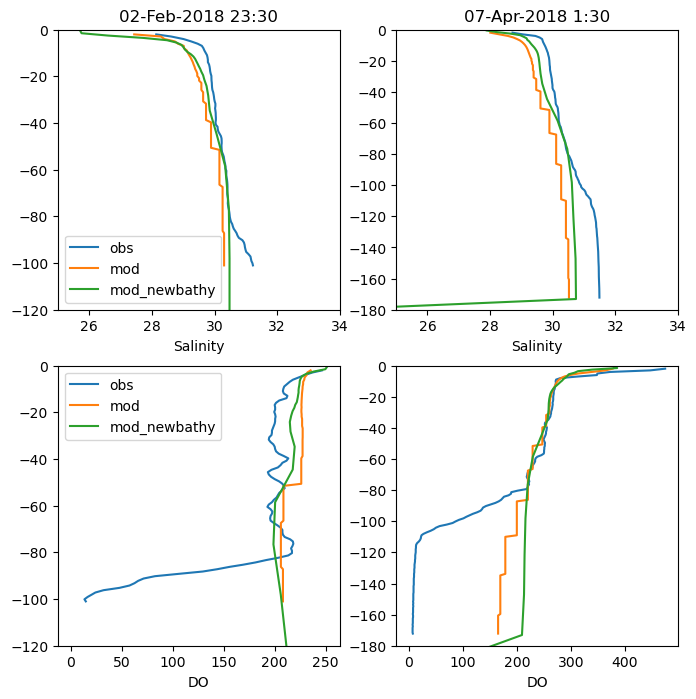

In [45]:
fig, ax = plt.subplots(2, 2, figsize = (8, 8)) 

ax[0,0].plot(df_obsFeb.SA,-df_obsFeb.Z,label='obs')
ax[0,0].plot(df_obsFeb.mod_vosaline,-df_obsFeb.Z,label='mod')
ax[0,0].plot(sal_Feb,-sal_Feb.deptht,label='mod_newbathy')
ax[0,0].set_ylim([-120, 0])
ax[0,0].set_xlim([25, 34])
ax[0,0].legend()
ax[0,0].set_title('02-Feb-2018 23:30')
ax[0,0].set_xlabel('Salinity')

ax[0,1].plot(df_obsApr.SA,-df_obsApr.Z,label='obs')
ax[0,1].plot(df_obsApr.mod_vosaline,-df_obsApr.Z,label='mod')
ax[0,1].plot(sal_Apr,-sal_Apr.deptht,label='mod_newbathy')
ax[0,1].set_ylim([-180, 0])
ax[0,1].set_xlim([25, 34])
ax[0,1].set_title('07-Apr-2018 1:30')
ax[0,1].set_xlabel('Salinity')

ax[1,0].plot(df_obsFeb.Oxygen_Dissolved,-df_obsFeb.Z,label='obs')
ax[1,0].plot(df_obsFeb.mod_dissolved_oxygen,-df_obsFeb.Z,label='mod')
ax[1,0].plot(oxy_Feb,-oxy_Feb.deptht,label='mod_newbathy')
ax[1,0].set_ylim([-120, 0])
ax[1,0].legend()
ax[1,0].set_xlabel('DO')

ax[1,1].plot(df_obsApr.Oxygen_Dissolved,-df_obsApr.Z,label='obs')
ax[1,1].plot(df_obsApr.mod_dissolved_oxygen,-df_obsApr.Z,label='mod')
ax[1,1].plot(oxy_Apr,-oxy_Apr.deptht,label='mod_newbathy')
ax[1,1].set_ylim([-180, 0])
ax[1,1].set_xlabel('DO')
